In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# ! mkdir data

In [3]:
# ! unzip boston-housing.zip -d data

In [4]:
# ! ls data

In [5]:
boston = pd.read_csv('data/train.csv')

In [6]:
print(boston.shape)
boston.sample(5)

(333, 15)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
301,463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5
84,124,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3
324,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
94,139,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3
82,122,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [7]:
boston.drop('ID', axis = 1, inplace=True)

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [9]:
boston.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

<Axes: >

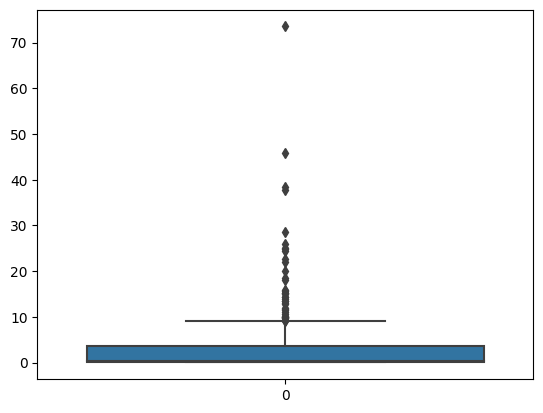

In [10]:
sns.boxplot(boston['crim'])

In [11]:
# Student-teacher ratio adjusted for average number of rooms
boston['student_teacher_ratio'] = boston['ptratio'] / boston['rm']

boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,student_teacher_ratio
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2.326996
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.772154
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2.672192
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2.616482
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,2.528277


In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crim                   333 non-null    float64
 1   zn                     333 non-null    float64
 2   indus                  333 non-null    float64
 3   chas                   333 non-null    int64  
 4   nox                    333 non-null    float64
 5   rm                     333 non-null    float64
 6   age                    333 non-null    float64
 7   dis                    333 non-null    float64
 8   rad                    333 non-null    int64  
 9   tax                    333 non-null    int64  
 10  ptratio                333 non-null    float64
 11  black                  333 non-null    float64
 12  lstat                  333 non-null    float64
 13  medv                   333 non-null    float64
 14  student_teacher_ratio  333 non-null    float64
dtypes: flo

In [13]:
boston.corr()['medv'].sort_values(ascending=False)

medv                     1.000000
rm                       0.689598
zn                       0.344842
black                    0.336660
dis                      0.249422
chas                     0.204390
rad                     -0.352251
age                     -0.358888
crim                    -0.407454
nox                     -0.413054
tax                     -0.448078
indus                   -0.473932
ptratio                 -0.481376
student_teacher_ratio   -0.632584
lstat                   -0.738600
Name: medv, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X = boston.drop('medv', axis = 1).copy()
y = boston['medv'].copy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((266, 14), (266,), (67, 14), (67,))

## Model Selection

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [19]:
X_train = std.transform(X_train)
X_val = std.transform(X_val)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()
# svc = SVC()
lr = LinearRegression()
# logr = LogisticRegression()
models = [rfr, dt, lr]

In [22]:
def calc_acc_loss(model, X_val,y_val):
    pred = model.predict(X_val)
    mse = mean_squared_error(y_val, pred)
    acc = r2_score(y_val, pred)
    return np.sqrt(mse), acc

In [23]:
rfr.fit(X_train, y_train)
rfr_loss, rfr_acc =  calc_acc_loss(rfr, X_val, y_val)

In [24]:
dt.fit(X_train, y_train)
dt_loss, dt_acc =  calc_acc_loss(dt, X_val, y_val)

In [25]:
# svc.fit(X_train, y_train)

In [26]:
lr.fit(X_train, y_train)
lr_loss, lr_acc =  calc_acc_loss(lr, X_val, y_val)

In [28]:
# logr.fit(X_train, y_train)
# logr_loss, logr_acc =  calc_acc_loss(logr, X_val, y_val)


In [43]:
acc_loss  = {
    'RandomForestRegressor': [rfr_loss, rfr_acc],
    'DecisionTreeRegressor': [dt_loss, dt_acc],
    'LinearRegression': [lr_loss, lr_acc] 
}
basic_acc_loss = pd.DataFrame(
    acc_loss,
    index = ['Models Loss', 'Models Accuracy'],
)

In [44]:
basic_acc_loss

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression
Models Loss,2.747835,4.890411,3.346551
Models Accuracy,0.916103,0.734261,0.875560
